In [1]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors

In [8]:
from sklearn.preprocessing import LabelEncoder

In [54]:
from sklearn.metrics import confusion_matrix

In [64]:
from sklearn.tree import export_graphviz

In [66]:
from IPython.display import Image

In [68]:
from sklearn.datasets import load_iris

In [69]:
from sklearn import tree

In [71]:
from graphviz import render

In [76]:
from sklearn.tree import export_graphviz

In [79]:
from IPython.display import Image

In [6]:
import pandas as pd 

In [17]:
import numpy as np 

In [23]:
import seaborn as sns

In [60]:
import matplotlib.pyplot as plt

In [65]:
import pydotplus

In [72]:
import graphviz

In [74]:
import pydotplus as pdot

In [2]:
clf = tree.DecisionTreeClassifier()

In [3]:
clf1 = svm.SVC()

In [4]:
clf2 = GaussianNB()

In [5]:
clf3 = neighbors.KNeighborsClassifier()

In [7]:
pinkFlam = pd.read_csv ('C:/Users/benbr/Desktop/catch-the-pink-flamingo/catchThePinkFlamingo.csv')
pinkFlam = pinkFlam.rename(columns=lambda x: x.strip())

In [9]:
enc = LabelEncoder()

In [10]:
label_encoder = enc.fit(pinkFlam['platformType'])

In [11]:
print ("Categorical classes:", label_encoder.classes_)

Categorical classes: ['android' 'iphone' 'linux' 'mac' 'windows']


In [12]:
integer_classes = label_encoder.transform(label_encoder.classes_)

In [13]:
print ("Integer classes:", integer_classes)

Integer classes: [0 1 2 3 4]


In [14]:
t = label_encoder.transform(pinkFlam['platformType'])

In [15]:
pinkFlam['EncPlatformType'] = t

In [16]:
X = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][0:846]

In [18]:
pinkFlam.replace("", np.nan, inplace=True)

In [19]:
pinkFlam = pinkFlam[np.isfinite(pinkFlam['count_buyId'])]

In [20]:
pinkFlam['user_category'] = np.where(pinkFlam['avg_price']> 5, 'HighRollers', 'PennyPinchers')

In [21]:
pinkFlam.head()

userId  userSessionId  teamLevel platformType  count_gameclicks  \
4      937           5652          1      android                39   
11    1623           5659          1       iphone               129   
13      83           5661          1      android               102   
17     121           5665          1      android                39   
18     462           5666          1      android                90   

    count_hits  count_buyId  avg_price  EncPlatformType  user_category  
4            0          1.0        1.0                0  PennyPinchers  
11           9          1.0       10.0                1    HighRollers  
13          14          1.0        5.0                0  PennyPinchers  
17           4          1.0        3.0                0  PennyPinchers  
18          10          1.0        3.0                0  PennyPinchers

In [26]:
Y = pinkFlam['user_category'][0:846]

In [27]:
X_test = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][846:1411]

In [28]:
Y_test = pinkFlam['user_category'][846:1411]

In [29]:
np.nan_to_num(X)

array([[ 1., 69.,  8.,  0.,  0.],
       [ 1., 31.,  5.,  0.,  1.],
       [ 1., 26.,  2.,  0.,  1.],
       ...,
       [ 3., 40.,  3.,  2.,  1.],
       [ 3., 42.,  5.,  0.,  1.],
       [ 3., 32.,  4.,  0.,  0.]])

In [30]:
X_test.fillna(X_test.mean())

teamLevel  count_gameclicks  count_hits  count_buyId  EncPlatformType
2978          6               110          15          2.0                2
2981          6               235          38          2.0                1
2984          6               235          26          3.0                0
2998          6               119          13          3.0                4
2999          6               116          11          2.0                1
3002          6               109          10          3.0                3
3005          6                98          19          1.0                0
3006          6               108           9          3.0                0
3009          6               111           9          1.0                0
3010          6               100          17          2.0                1
3011          6               109          16          1.0                4
3012          6                76          16          1.0                1
3018          6               152          28          1.0                1
3022          6               167          24          1.0                0
3023          6               147          21          2.0                1
3032          6               124          26          4.0                1
3038          6               304          38          3.0                1
3043          6               147          18          2.0                0
3047          6                44           6          1.0                1
3048          6               140          11          1.0                1
3049          6               140          12          1.0                0
3051          6               185          28          1.0                1
3052          6               218          29          1.0                1
3053          6               180          30          1.0                0
3054          6               183          17          3.0                1
3055          6               188          17          2.0                4
3057          6               200          29          2.0                1
3059          6                79           9          1.0                0
3066          6                88          14          3.0                1
3068          6                79          11          1.0                0
...         ...               ...         ...          ...              ...
4497          6               164          23          4.0                3
4498          6               181          15          2.0                0
4500          6               187          22          3.0                4
4501          6               171          25          1.0                0
4503          5                74          10          1.0                1
4505          3               353          33          1.0                2
4507          3               331          36          1.0                1
4508          7                76           2          1.0                1
4516          3               243          24          1.0                0
4519          3               233          29          2.0                3
4529          7               115          16          2.0                1
4531          2               706          75          2.0                4
4535          5               335          30          1.0                0
4542          4               316          34          2.0                4
4546          6               115          14          1.0                4
4547          7                 6           2          1.0                1
4550          6               148          14          1.0                4
4558          6                78           8          2.0                2
4568          4               215          24          2.0                0
4569          4               482          56          1.0                0
4572          4               384          42         

In [31]:
np.nan_to_num(Y)

array(['PennyPinchers', 'HighRollers', 'PennyPinchers', 'PennyPinchers',
       'PennyPinchers', 'HighRollers', 'PennyPinchers', 'PennyPinchers',
       'PennyPinchers', 'HighRollers', 'PennyPinchers', 'HighRollers',
       'PennyPinchers', 'PennyPinchers', 'HighRollers', 'HighRollers',
       'PennyPinchers', 'HighRollers', 'PennyPinchers', 'HighRollers',
       'HighRollers', 'HighRollers', 'PennyPinchers', 'HighRollers',
       'PennyPinchers', 'HighRollers', 'PennyPinchers', 'HighRollers',
       'HighRollers', 'HighRollers', 'HighRollers', 'HighRollers',
       'HighRollers', 'HighRollers', 'PennyPinchers', 'PennyPinchers',
       'HighRollers', 'PennyPinchers', 'HighRollers', 'HighRollers',
       'PennyPinchers', 'PennyPinchers', 'PennyPinchers', 'PennyPinchers',
       'HighRollers', 'PennyPinchers', 'HighRollers', 'PennyPinchers',
       'HighRollers', 'PennyPinchers', 'PennyPinchers', 'PennyPinchers',
       'HighRollers', 'PennyPinchers', 'PennyPinchers', 'PennyPinchers',
  

In [32]:
clf = clf.fit(np.nan_to_num(X) , np.nan_to_num(Y))

In [33]:
clf1 = clf1.fit(np.nan_to_num(X) , np.nan_to_num(Y))

In [34]:
clf2 = clf2.fit(np.nan_to_num(X) , np.nan_to_num(Y))

In [35]:
clf3 = clf3.fit(np.nan_to_num(X) , np.nan_to_num(Y))

In [36]:
X_test = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][846:1411]

In [37]:
Y_test = pinkFlam['user_category'][846:1411]

In [38]:
Y_prediction  = clf.predict(X_test)

In [39]:
Y_prediction1 = clf1.predict(X_test)

In [40]:
Y_prediction2 = clf2.predict(X_test)

In [41]:
Y_prediction3 = clf3.predict(X_test)

In [42]:
print("Prediction for Naive Bayes : ",Y_prediction2)

Prediction for Naive Bayes :  ['HighRollers' 'HighRollers' 'HighRollers' 'HighRollers' 'PennyPinchers'
 'HighRollers' 'PennyPinchers' 'HighRollers' 'PennyPinchers' 'HighRollers'
 'PennyPinchers' 'PennyPinchers' 'HighRollers' 'PennyPinchers'
 'HighRollers' 'HighRollers' 'HighRollers' 'HighRollers' 'PennyPinchers'
 'PennyPinchers' 'PennyPinchers' 'HighRollers' 'HighRollers' 'HighRollers'
 'HighRollers' 'HighRollers' 'HighRollers' 'PennyPinchers' 'HighRollers'
 'PennyPinchers' 'HighRollers' 'PennyPinchers' 'PennyPinchers'
 'PennyPinchers' 'HighRollers' 'PennyPinchers' 'PennyPinchers'
 'HighRollers' 'PennyPinchers' 'PennyPinchers' 'HighRollers' 'HighRollers'
 'PennyPinchers' 'PennyPinchers' 'PennyPinchers' 'HighRollers'
 'HighRollers' 'HighRollers' 'HighRollers' 'HighRollers' 'HighRollers'
 'HighRollers' 'HighRollers' 'HighRollers' 'HighRollers' 'HighRollers'
 'PennyPinchers' 'HighRollers' 'PennyPinchers' 'HighRollers'
 'PennyPinchers' 'HighRollers' 'PennyPinchers' 'HighRollers' 'HighRolle

In [43]:
print("Accuracy for Decision Tree : ",accuracy_score(Y_test,Y_prediction))

Accuracy for Decision Tree :  0.5292035398230088


In [44]:
print("Accuracy for SVM : ",accuracy_score(Y_test,Y_prediction1))

Accuracy for SVM :  0.5646017699115045


In [45]:
print("Accuracy for K neighbors : ",accuracy_score(Y_test,Y_prediction3))

Accuracy for K neighbors :  0.5274336283185841


In [46]:
Y_prediction  = clf.predict(X_test)

In [47]:
np.unique(Y_prediction)

array(['HighRollers', 'PennyPinchers'], dtype=object)

In [48]:
pinkFlam_evaluation = pinkFlam[846:1411]

In [51]:
y_pred = pinkFlam_evaluation['Predicted_UserCategory']

In [52]:
pinkFlam_evaluation[['Predicted_UserCategory' , 'user_category' ]]

Predicted_UserCategory  user_category
2978            HighRollers  PennyPinchers
2981          PennyPinchers    HighRollers
2984          PennyPinchers  PennyPinchers
2998            HighRollers  PennyPinchers
2999            HighRollers    HighRollers
3002            HighRollers  PennyPinchers
3005            HighRollers    HighRollers
3006            HighRollers  PennyPinchers
3009          PennyPinchers    HighRollers
3010          PennyPinchers    HighRollers
3011            HighRollers  PennyPinchers
3012            HighRollers  PennyPinchers
3018            HighRollers    HighRollers
3022            HighRollers  PennyPinchers
3023            HighRollers    HighRollers
3032            HighRollers    HighRollers
3038          PennyPinchers    HighRollers
3043            HighRollers  PennyPinchers
3047          PennyPinchers    HighRollers
3048            HighRollers    HighRollers
3049          PennyPinchers  PennyPinchers
3051          PennyPinchers    HighRollers
3052          PennyPinchers    HighRollers
3053          PennyPinchers  PennyPinchers
3054          PennyPinchers    HighRollers
3055          PennyPinchers  PennyPinchers
3057          PennyPinchers    HighRollers
3059            HighRollers  PennyPinchers
3066            HighRollers    HighRollers
3068            HighRollers  PennyPinchers
...                     ...            ...
4497          PennyPinchers  PennyPinchers
4498          PennyPinchers    HighRollers
4500          PennyPinchers  PennyPinchers
4501            HighRollers  PennyPinchers
4503          PennyPinchers  PennyPinchers
4505          PennyPinchers  PennyPinchers
4507          PennyPinchers  PennyPinchers
4508            HighRollers  PennyPinchers
4516          PennyPinchers  PennyPinchers
4519          PennyPinchers    HighRollers
4529          PennyPinchers    HighRollers
4531            HighRollers  PennyPinchers
4535          PennyPinchers  PennyPinchers
4542          PennyPinchers  PennyPinchers
4546          PennyPinchers  PennyPinchers
4547          PennyPinchers    HighRollers
4550            HighRollers  PennyPinchers
4558            HighRollers  PennyPinchers
4568          PennyPinchers  PennyPinchers
4569          PennyPinchers  PennyPinchers
4572          PennyPinchers  PennyPinchers
4584          PennyPinchers  PennyPinchers
4585            HighRollers    HighRollers
4587          PennyPinchers  PennyPinchers
4592          PennyPinchers  PennyPinchers
4596            HighRollers  PennyPinchers
4597          PennyPinchers  PennyPinchers
4614            HighRollers  PennyPinchers
4615            HighRollers    HighRollers
4616          PennyPinchers    HighRollers

[565 rows x 2 columns]

In [53]:
y_true = pinkFlam_evaluation['user_category'] 

In [55]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [56]:
unique_label = np.unique(y_true)

In [57]:
print(pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

                    pred:HighRollers  pred:PennyPinchers
true:HighRollers                  94                 148
true:PennyPinchers               118                 205


Text(0.5, 15.0, 'Predicted User Category')

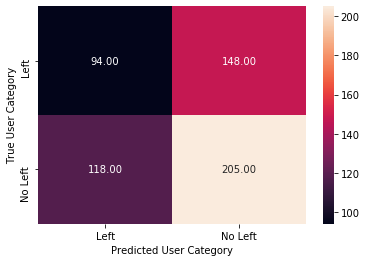

In [81]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])
sns.heatmap(cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True User Category')
plt.xlabel('Predicted User Category')

In [67]:
export_graphviz( clf,
              out_file = "pinkFlamingo_tree.odt",
              feature_names = X.columns )

In [77]:
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'pinkFlamingo_tree.odt' )

In [78]:
chd_tree_graph.write_jpg( 'pinkFlamingo_tree.jpg' )

True

In [80]:
Image(filename='pinkFlamingo_tree.jpg')